## Case study 4: Classifying Whiskies

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering

We can create series with `pd.Series()` and if we dont specify index, for example: `df = pd.Series([1,2,3])` just that. When we call `df`, the output will be:

```
>>> df
>>> 0   1
    1   2
    2   3
```

But if we create series with specified index, as in the cell below, you can see the output.

In [4]:
x = pd.Series([12,13,17,19], index=['a','b','c','d'])
x

a    12
b    13
c    17
d    19
dtype: int64

We can access values in Series as follows:
```
x['a']
```
and the output will be:
```
>>> 12
```

Dictionaries can also be used to create a series.

In [5]:
# Create a dic
age = {'Tim': 28, 'Berg': 22, 'Joe': 20, 'Nick':31}
# assign th series to a variable
x = pd.Series(age)
x

Tim     28
Berg    22
Joe     20
Nick    31
dtype: int64

_Notice how the keys and values are designed as index and values respectively._
Now let's do something slightly complex.

In [7]:
data = {
    'name': ['Tim', 'Berg', 'Joe', 'Nick'],
    'age': [28, 22, 20, 31],
    'ZIP': ['02115', '02130', '67700', '00100']
}

If you don't specify the order of columns, it is `pd.DataFrame(data)`, you'll get a dataframe with the exact order as stated in the dictionary.
If you want to change the order, you can do it as follows:

In [12]:
pd.DataFrame(data, columns=['name','ZIP','age'])

,name,ZIP,age
0,Tim,02115,28
1,Berg,02130,22
2,Joe,67700,20
3,Nick,00100,31


If you want to work with this data frame you will have to assign to a variable. In this case I just wanted to show you, that's why i havent assigned.

What happens if you change its names:
 
`pd.DataFrame(data, columns=['nam1','name2','name3'])`  ? 

In [2]:
'''
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data[0]
'''

In [6]:
'''
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data
'''

0    4
1    1
2    2
3    3
dtype: int64

Now let's lead and inspect some data:

In [ ]:
whisky = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1153839555bf414586310c9098e4aae1/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/whiskies.txt')

# Let's add more data

whisky['Regions'] = pd.read_csv('https://courses.edx.org/assets/courseware/v1/c47e706fa1c4d367c99e27a275050678/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/regions.txt')

whisky



Now lets subset the data with all the flavors there.

In [21]:
flavors = whisky.iloc[:,2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [22]:
# and do a correlation
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


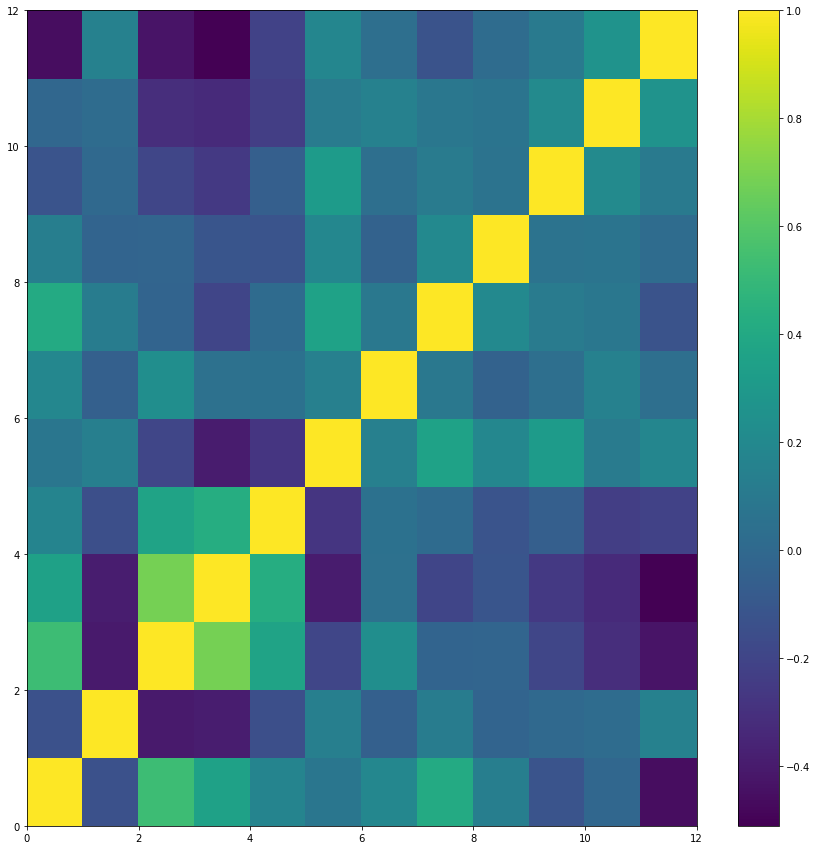

In [27]:
# now lets visualize this
plt.figure(figsize=(15,15))     # To specify the size of the figure
plt.pcolor(corr_flavors)        # to give pseudocolors based on the values in corr_flavors
plt.colorbar()
#plt.savefig('erase_it.pdf')    # to save the fig, but i don't want to do it
                                # take into account that pdf is best format to
                                # see images without pixeling

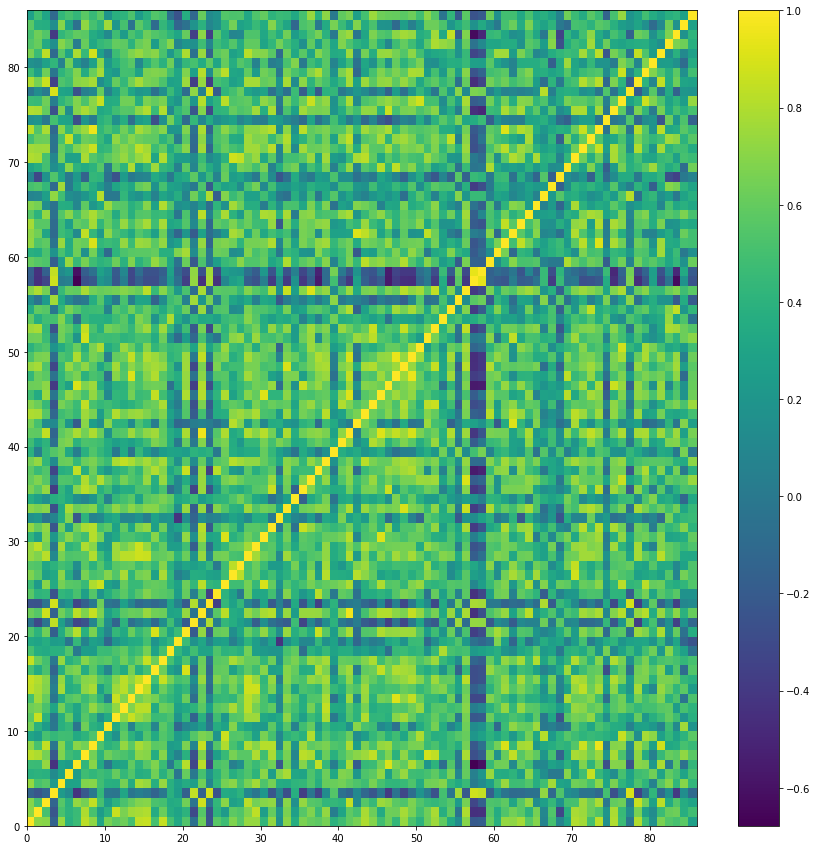

In [34]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())

plt.figure(figsize=(15,15))
plt.pcolor(corr_whisky)
plt.axis('tight')
plt.colorbar()


In [40]:
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model

sklearn.cluster._bicluster.SpectralCoclustering

In [41]:
np.sum(model.rows_,axis=1)

array([20,  5, 19, 17,  6, 19])

In [43]:
np.sum(model.rows_,axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)

In [49]:
model.row_labels_.size

86

Now what's going to be done is:

- Add the labels of clusters (from 0 to 5) to each observation (in this case, each whisky).
- use np.argsort to arange the labels (from 0 to 5).
- use iloc[] (ix[] is deprecated) to sort the dataframe with the previus result.
- reset indexes.

In [54]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop = True)

In [ ]:
whisky

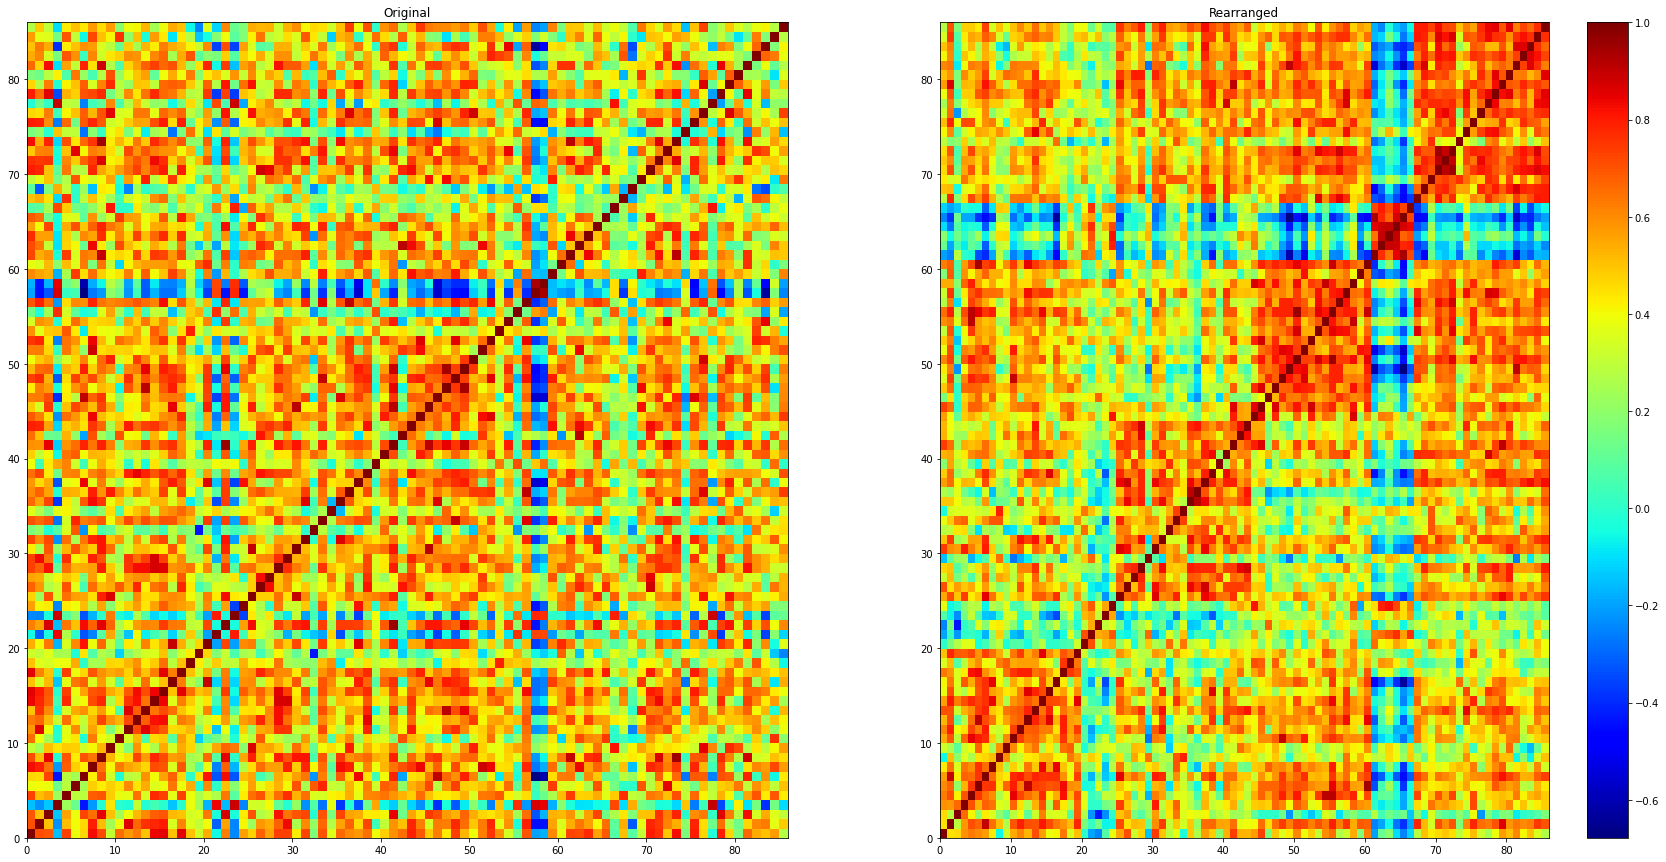

In [71]:
plt.figure(figsize = (30,15))
plt.subplot(121)
plt.pcolor(corr_whisky, cmap='jet')
plt.title('Original')
plt.subplot(122)
plt.pcolor(correlations, cmap='jet')
plt.title('Rearranged')
plt.colorbar()